In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import requests
from bs4 import BeautifulSoup, Comment
from tqdm import tqdm
import pandas as pd
from sports_ref.transform import filter_df, merge_with_prev_year
from sports_ref.basketball_ref import get_advanced_stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/harrisonchase/workplace/sports_ref/.venv/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
all_df = get_advanced_stats(2000, 2019)

100%|██████████| 19/19 [00:37<00:00,  1.95s/it]


In [4]:
all_df = filter_df(all_df)

In [6]:
merged_df = merge_with_prev_year(all_df, 1)

In [7]:
merged_df['bpm'] = merged_df['bpm'].astype(float)
merged_df['bpm___1'] = merged_df['bpm___1'].astype(float)
merged_df['mp'] = merged_df['mp'].astype(float)
merged_df['mp___1'] = merged_df['mp___1'].astype(float)

In [8]:
merged_df['diff'] = merged_df['bpm'] - merged_df['bpm___1']

In [9]:
merged_df['mp_avg'] = 2 / (1/ merged_df['mp'] + 1/merged_df['mp___1'])

In [10]:
def _calc_delta(df):
    df = df.dropna(subset=['mp_avg', 'diff'])
    return (df['diff'] * df['mp_avg']).sum() / df['mp_avg'].sum()

In [11]:
age = merged_df.groupby('age').apply(_calc_delta)

/Users/harrisonchase/workplace/sports_ref_scraper/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


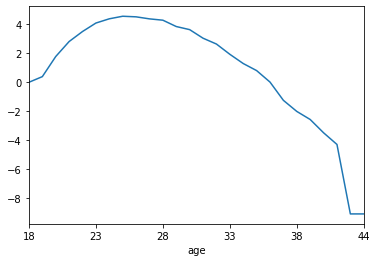

In [12]:
age.fillna(0).cumsum().plot()

In [4]:
url = 'https://www.basketball-reference.com/leagues/NBA_2019_advanced.html'


In [5]:
r = requests.get(url)

In [6]:
soup = BeautifulSoup(r.content)

In [14]:
str(soup)

'<!DOCTYPE html>\n<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">\n<head>\n<meta charset="utf-8"/>\n<meta content="ie=edge" http-equiv="x-ua-compatible"/>\n<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>\n<link href="https://d2p3bygnnzw9w3.cloudfront.net/req/201910091" rel="dns-prefetch"/>\n<!-- no:cookie fast load the css.           -->\n<script>function gup(n) {n = n.replace(/[\\[]/, \'\\\\[\').replace(/[\\]]/, \'\\\\]\'); var r = new RegExp(\'[\\\\?&]\'+n+\'=([^&#]*)\'); var re = r.exec(location.search);   return re === null?\'\':decodeURIComponent(re[1].replace(/\\+/g,\' \'));}; document.srdev = gup(\'srdev\')</script>\n<link crossorigin="" href="https://d2p3bygnnzw9w3.cloudfront.net" rel="preconnect"/>\n<link crossorigin="" href="https://d2cwpp38twqe55.cloudfront.net" rel="preconnect"/>\n<style>html,body{margin:0;padding:0;font:14px/1.25 "Helvetica Neue",

In [9]:
html = soup.html

In [12]:
type(html)

bs4.element.Tag